In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
from empiricaldist import Pmf
import time

# record time before execution
start_time = time.time()

# Data Preparation

In [3]:
# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

# Creating functions for dataset analysis
purchase_data['Purchase ID']= 'Heroes_of_Pymoli'
tot_players = purchase_data['SN'].nunique()
def len_unique (x):
    return len(x.unique())
def percentage (x):
    return len_unique(x)/tot_players*100
def analysis (x):
    df_analysis = purchase_data.groupby(x).agg(Number_of_Players = ("SN", len_unique), 
                                                        Percent_of_Players = ("SN", percentage), 
                                                        Number_of_Unique_Items = ("Item Name", len_unique),
                                                        Average_Price_USD = ("Price", 'mean'), 
                                                        Number_of_Purchases = ("Price", 'count'), 
                                                        Revenue_USD = ("Price", 'sum'))
    df_analysis['Revenue_per_Person'] = df_analysis['Revenue_USD']/df_analysis['Number_of_Players']
    return df_analysis

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,Heroes_of_Pymoli,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,Heroes_of_Pymoli,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,Heroes_of_Pymoli,Ithergue48,24,Male,92,Final Critic,4.88
3,Heroes_of_Pymoli,Chamassasya86,24,Male,100,Blindscythe,3.27
4,Heroes_of_Pymoli,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,Heroes_of_Pymoli,Aethedru70,21,Female,60,Wolf,3.54
776,Heroes_of_Pymoli,Iral74,21,Male,164,Exiled Doomblade,1.63
777,Heroes_of_Pymoli,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,Heroes_of_Pymoli,Sisur91,7,Male,92,Final Critic,4.19


## Purchasing Analysis (Total)

In [5]:
analysis('Purchase ID')

,Number_of_Players,Percent_of_Players,Number_of_Unique_Items,Average_Price_USD,Number_of_Purchases,Revenue_USD,Revenue_per_Person
Purchase ID,,,,,,,
Heroes_of_Pymoli,576,100.00,179,3.05,780,"2,379.77",4.13


## Gender Demographics and Purchasing Analysis

In [6]:
analysis('Gender')

,Number_of_Players,Percent_of_Players,Number_of_Unique_Items,Average_Price_USD,Number_of_Purchases,Revenue_USD,Revenue_per_Person
Gender,,,,,,,
Female,81,14.06,90,3.20,113,361.94,4.47
Male,484,84.03,178,3.02,652,"1,967.64",4.07
Other / Non-Disclosed,11,1.91,13,3.35,15,50.19,4.56


## Age Demographics and Purchasing Analysis

In [7]:
age_df = analysis('Age')

Text(0.5, 1.0, 'Number of players over age')

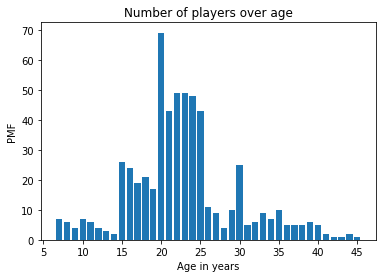

In [8]:
num_players=age_df['Number_of_Players']
Pmf(num_players).bar()
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.title("Number of players over age")

In [9]:
#Binning
age_df=age_df.reset_index()

group_names = ["<10", "10-14", "15-19", "20-24","25-29","30-34","35-39","40+"]
bins = [0,10,15,20,25,30,35,40,46]
age_df["Age Ranges"] = pd.cut(age_df["Age"], bins=bins,right = False, labels=group_names)
age_df

age_df = age_df.groupby("Age Ranges").agg(Purchase_Count = ('Number_of_Unique_Items', 'sum'),
                                          Average_Purchase_Price = ('Average_Price_USD','mean'), 
                                          Total_Purchase_Value =('Revenue_USD', 'sum'),
                                          Avg_Total_Purchase_per_Person = ('Revenue_per_Person', 'mean'))
age_df

,Purchase_Count,Average_Purchase_Price,Total_Purchase_Value,Avg_Total_Purchase_per_Person
Age Ranges,,,,
<10,23,3.32,77.13,4.53
10-14,28,2.93,82.78,3.65
15-19,127,3.03,412.89,3.85
20-24,306,3.04,"1,114.06",4.30
25-29,91,2.62,293.00,3.31
30-34,72,2.87,214.00,4.01
35-39,40,3.51,147.67,4.71
40+,13,3.06,38.24,3.15


## Top Spenders

In [10]:
spending_df = analysis('SN').filter(['Number_of_Purchases', 'Average_Price_USD', 'Revenue_USD'])
spending_df.sort_values('Revenue_USD', ascending=False).head()

,Number_of_Purchases,Average_Price_USD,Revenue_USD
SN,,,
Lisosia93,5,3.79,18.96
Idastidru52,4,3.86,15.45
Chamjask73,3,4.61,13.83
Iral74,4,3.40,13.62
Iskadarya95,3,4.37,13.10


## Most Popular Items

In [11]:
popular_df = purchase_data.filter(['Item ID', 'Item Name', 'Price'])
popular_df = popular_df.groupby(['Item ID', 'Item Name']).agg(Purchase_Count=('Price', 'count'),
                                                              Item_Price = ("Price", 'mean'),
                                                             Total_Purchase_Value=('Price', 'sum'))
popular_df.sort_values('Purchase_Count', ascending=False).head()

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
132,Persuasion,9,3.22,28.99
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77


## Most Profitable Items

In [12]:
popular_df.sort_values('Total_Purchase_Value', ascending=False).head()

,,Purchase_Count,Item_Price,Total_Purchase_Value
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
103,Singed Scalpel,8,4.35,34.80


In [13]:
# record time after execution
end_time = time.time()
print("Result calculated in {:,.2f} sec".format(end_time - start_time))

Result calculated in 0.55 sec
